In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math
from scipy import stats
from scipy.integrate import quad
from scipy.stats import norm
from scipy.optimize import brentq

# Case 7: Option Pricing with the Heston Model

## Monte-Carlo

In [4]:
V0 = 0.1**2
S0 = np.log(100)
lambda_ = 2
theta = 0.1**2
T = 10
sigma_v = 0.1
n_steps = 1000
n_simulations = 10000
rho = -0.5
r = 0.02

In [32]:
# Parameters
S0 = 100        # Initial stock price
r = 0.02        # Risk-free rate
T = 10          # Maturity time (in years)
strikes = np.arange(50, 201, 10)  # Strike prices
number_of_simulations = 1000000  # Reduced number of Monte Carlo simulations
time_steps = 100  # Reduced number of time steps

# Heston Model Parameters
theta = 0.1**2  # Long-term variance
kappa = 2       # Mean-reversion rate
sigma_v = 0.1   # Volatility of volatility
rho = -0.5      # Correlation between W_S and W_V
V0 = 0.1**2     # Initial variance

In [33]:
# Exercise 1
def monte_carlo_simulation_heston(V0, S0, kappa, theta, T, sigma_v, time_steps, number_of_simulations, rho, r):
    #np.random.seed(0)  # For reproducibility
    Z1 = np.random.normal(size=(time_steps, number_of_simulations))  # For stock prices
    Z2 = np.random.normal(size=(time_steps, number_of_simulations))  # For volatility
    W_S = Z1
    W_V = rho * Z1 + np.sqrt(1 - rho**2) * Z2

    dt = T / time_steps  # Reduced time steps
    x = np.full(number_of_simulations, np.log(S0))
    v = np.full(number_of_simulations, V0)

    for t in range(time_steps):
        sqrt_v = np.sqrt(np.maximum(v, 0))
        x += (r - 0.5 * v) * dt + sqrt_v * np.sqrt(dt) * W_S[t]
        v += kappa * (theta - v) * dt + sigma_v * sqrt_v * np.sqrt(dt) * W_V[t]
        v = np.maximum(v, 0)  # Ensure variance stays non-negative

    S_T_heston = np.exp(x)
    return S_T_heston

S_T_heston = monte_carlo_simulation_heston(V0, S0, kappa, theta, T, sigma_v, time_steps, number_of_simulations, rho, r)


In [ ]:
# Calculate call option prices for each strike
call_prices_heston = []
SE = []
discount_factor = np.exp(-r*T)

for K in strikes:
    # Heston model prices
    payoffs_heston = np.maximum(S_T_heston - K, 0)
    price_heston = np.exp(-r * T) * np.mean(payoffs_heston)
    payoff_std = np.std(payoffs_heston)
    se = discount_factor * payoff_std / np.sqrt(number_of_simulations)

    call_prices_heston.append(price_heston)
    SE.append(se)


# Display results
print("Strike\tHeston Call Price")
for K, price_heston, se in zip(strikes, call_prices_heston, SE):
    print(f"{K}\t{price_heston:} ± {se:}")


Strike	Heston Call Price
50	59.058624034014656 ± 0.03160239767820745
60	50.99648375645509 ± 0.0313868696852583
70	43.15487232945375 ± 0.03087075870482115
80	35.71388657104994 ± 0.02991358446511778
90	28.86653447971453 ± 0.028446832472632924
100	22.779734998253307 ± 0.02649273349934063
110	17.5596331599988 ± 0.02415355353201692
120	13.2371750235883 ± 0.02157734406033555
130	9.770686600088235 ± 0.01892317290180875
140	7.076595142500846 ± 0.016325354247522253
150	5.036555853408148 ± 0.013887563498385457
160	3.5287091995157565 ± 0.011674782939316366
170	2.438862083829533 ± 0.009718252955977143
180	1.6658794001833364 ± 0.008023828581459188
190	1.1252150939437102 ± 0.006581047793712232
200	0.7532277287787588 ± 0.005368603346793097


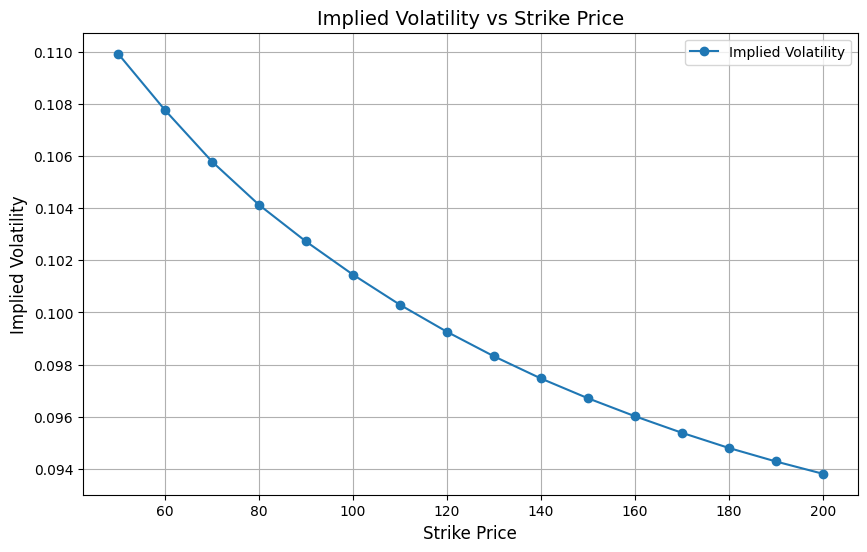

In [41]:
heston_prices = [59.0989, 51.0349, 43.1889, 35.7423, 28.8939, 
                 22.8067, 17.5841, 13.2574, 9.7874, 7.0874, 
                 5.0446, 3.5350, 2.4425, 1.6670, 1.1264, 0.7544, 0.5003,
0.3304,0.2168,0.1419,0.0924,0.0599,0.0388,0.0254,0.0168,0.0110,               
0.0071,0.0046,0.0029,0.0018,0.0012]

def BlackScholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def impliedVolatility(price, S, K, T, r):
    def objFunc(sigma):
        return BlackScholes_call(S, K, T, r, sigma) - price
    try:
        # brentq root-finding (numerical method) used to solve for sigma 
        return brentq(objFunc, 1e-6, 5)
    except ValueError:
        return np.nan

impliedVolatilities = []
for K, price in zip(strikes, heston_prices):
    impVol = impliedVolatility(price, S0, K, T, r)
    impliedVolatilities.append(impVol)

plt.figure(figsize=(10, 6))
plt.plot(strikes, impliedVolatilities, marker='o', label='Implied Volatility')
plt.title("Implied Volatility vs Strike Price", fontsize=14)
plt.xlabel("Strike Price", fontsize=12)
plt.ylabel("Implied Volatility", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


## Fourier Transform

In [ ]:
# Exercise 2


Heston Fourier Call Price: 144992558862657214016118226932238556020846611600565720654551921445243078812104824537894363501689441451804549459133131545053996528093878321460610371215888476586961015875660688445524589474514320763656167805559681157821691347337216.0000
